Nafis Ahmed ||
132786195

# Time series on regional data

In [253]:
import pandas as pd

data = pd.read_csv("PORT941UR.csv")
data = data.rename(columns={"PORT941UR": "unemployment", "DATE": "date"})
data.head()

,date,unemployment
0,1990-01-01,4.1
1,1990-02-01,4.1
2,1990-03-01,4.1
3,1990-04-01,4.1
4,1990-05-01,4.2


## Data Pre-processing

In [254]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data.head()

,date,unemployment,year,month
0,1990-01-01,4.1,1990,1
1,1990-02-01,4.1,1990,2
2,1990-03-01,4.1,1990,3
3,1990-04-01,4.1,1990,4
4,1990-05-01,4.2,1990,5


In [255]:
from datetime import date


newDATE = []
for y, m in zip(data['year'], data['month']):
    newDATE.append(date(y, m, 1))


data['DATE'] = newDATE
data

,date,unemployment,year,month,DATE
0,1990-01-01,4.1,1990,1,1990-01-01
1,1990-02-01,4.1,1990,2,1990-02-01
2,1990-03-01,4.1,1990,3,1990-03-01
3,1990-04-01,4.1,1990,4,1990-04-01
4,1990-05-01,4.2,1990,5,1990-05-01
...,...,...,...,...,...
376,2021-05-01,6.0,2021,5,2021-05-01
377,2021-06-01,5.7,2021,6,2021-06-01
378,2021-07-01,5.3,2021,7,2021-07-01
379,2021-08-01,4.9,2021,8,2021-08-01


### Subset dataframe into 2000 - 2021 time frame

In [264]:
data['DATE'] = pd.to_datetime(data['DATE'])  

mask = (data['DATE'] >= '2000-01-01') & (data['DATE'] <= '2021-12-31')

### Plot Regional unemployment rate over time

In [267]:
z = data.loc[mask]["date"]
c = data.loc[mask]["unemployment"]

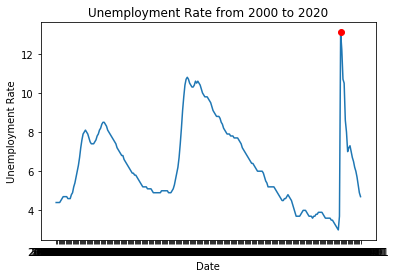

In [393]:
c.max() #13.1

max_ind = list(c)
max_index = max_ind.index(max_value)


plt.plot(z,c)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate from 2000 to 2020")
plt.plot([243], [13.1], marker='o', markersize=6, color="red")

The number of long-term unemployed (those jobless for 27 weeks or more) increased by 414,000 over the month to 6.5 million. In March, 44.1 percent of unemployed persons were jobless for 27 weeks or more.

The civilian labor force participation rate (64.9 percent) and the employment–population ratio (58.6 percent) continued to edge up in March.

There were 1.0 million discouraged workers in March, up by 309,000 from a year earlier (not seasonally adjusted).

Based on the plot, it seems that unemployment rate increases every 5-10 years and decreases otherwise

# Time series on national data

In [304]:
nation_data = pd.read_csv("Nations.csv")
nation_data

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
0,2011,Jan,65.5,58.9,1999833,1798493,201340,10.1
1,2011,Feb,65.4,59.0,1998756,1801913,196843,9.8
2,2011,Mar,65.3,59.0,1997052,1803636,193416,9.7
3,2011,Apr,65.2,59.0,1995371,1803756,191615,9.6
4,2011,May,65.1,58.9,1994438,1802840,191598,9.6
...,...,...,...,...,...,...,...,...
125,2021,Jun,62.5,59.0,2168510,2047149,121361,5.6
126,2021,Jul,62.5,59.2,2170615,2056679,113936,5.2
127,2021,Aug,62.5,59.4,2170411,2062899,107512,5.0
128,2021,Sep,62.4,59.5,2170982,2068818,102164,4.7


In [305]:
month_labels = {"Jan": 1, "Feb": 2, "Mar": 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}



nation_data['month'] = nation_data['Period'].apply(lambda x: month_labels[x])
nation_data

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,month
0,2011,Jan,65.5,58.9,1999833,1798493,201340,10.1,1
1,2011,Feb,65.4,59.0,1998756,1801913,196843,9.8,2
2,2011,Mar,65.3,59.0,1997052,1803636,193416,9.7,3
3,2011,Apr,65.2,59.0,1995371,1803756,191615,9.6,4
4,2011,May,65.1,58.9,1994438,1802840,191598,9.6,5
...,...,...,...,...,...,...,...,...,...
125,2021,Jun,62.5,59.0,2168510,2047149,121361,5.6,6
126,2021,Jul,62.5,59.2,2170615,2056679,113936,5.2,7
127,2021,Aug,62.5,59.4,2170411,2062899,107512,5.0,8
128,2021,Sep,62.4,59.5,2170982,2068818,102164,4.7,9


In [306]:
nation_data.drop(nation_data.tail(1).index,inplace=True)
nation_data

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,month
0,2011,Jan,65.5,58.9,1999833,1798493,201340,10.1,1
1,2011,Feb,65.4,59.0,1998756,1801913,196843,9.8,2
2,2011,Mar,65.3,59.0,1997052,1803636,193416,9.7,3
3,2011,Apr,65.2,59.0,1995371,1803756,191615,9.6,4
4,2011,May,65.1,58.9,1994438,1802840,191598,9.6,5
...,...,...,...,...,...,...,...,...,...
124,2021,May,62.5,58.9,2166857,2040206,126651,5.8,5
125,2021,Jun,62.5,59.0,2168510,2047149,121361,5.6,6
126,2021,Jul,62.5,59.2,2170615,2056679,113936,5.2,7
127,2021,Aug,62.5,59.4,2170411,2062899,107512,5.0,8


In [322]:
from datetime import date


DATE = []
for y, m in zip(nation_data['Year'], nation_data['month']):
    DATE.append(date(y, m, 1))


nation_data['DATE'] = DATE
nation_data

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,month,DATE
0,2011,Jan,65.5,58.9,1999833,1798493,201340,10.1,1,2011-01-01
1,2011,Feb,65.4,59.0,1998756,1801913,196843,9.8,2,2011-02-01
2,2011,Mar,65.3,59.0,1997052,1803636,193416,9.7,3,2011-03-01
3,2011,Apr,65.2,59.0,1995371,1803756,191615,9.6,4,2011-04-01
4,2011,May,65.1,58.9,1994438,1802840,191598,9.6,5,2011-05-01
...,...,...,...,...,...,...,...,...,...,...
124,2021,May,62.5,58.9,2166857,2040206,126651,5.8,5,2021-05-01
125,2021,Jun,62.5,59.0,2168510,2047149,121361,5.6,6,2021-06-01
126,2021,Jul,62.5,59.2,2170615,2056679,113936,5.2,7,2021-07-01
127,2021,Aug,62.5,59.4,2170411,2062899,107512,5.0,8,2021-08-01


### Plot the national data

Text(0, 0.5, 'Unemployment Rate')

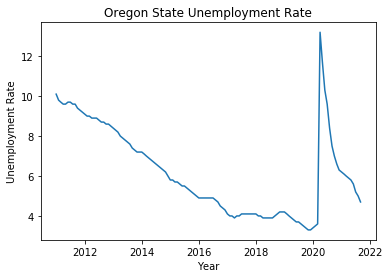

In [323]:
plt.plot(nation_data['DATE'],nation_data['unemployment rate'])
plt.title("Oregon State Unemployment Rate")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

## Compare the two datasets in the year range 2011 -> 2021-09-01

Text(0, 0.5, 'Unemployment Rate')

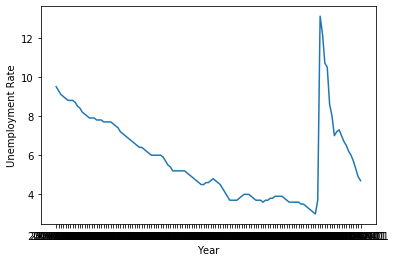

In [331]:
#NATIONAL DATA

mask1 = (data['DATE'] >= '2011-01-01') & (data['DATE'] <= '2021-09-01')

a = data.loc[mask1]["date"]
b = data.loc[mask1]["unemployment"]

plt.plot(a,b)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

Text(0, 0.5, 'Unemployment Rate')

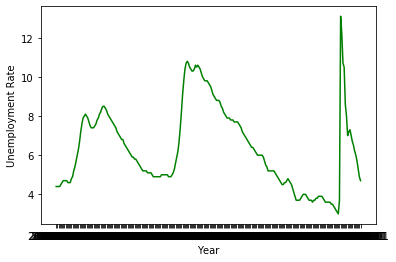

In [332]:
#Portland-Hillsboro-Vancouver area

plt.plot(z,c, color = 'green')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

## Smoothing

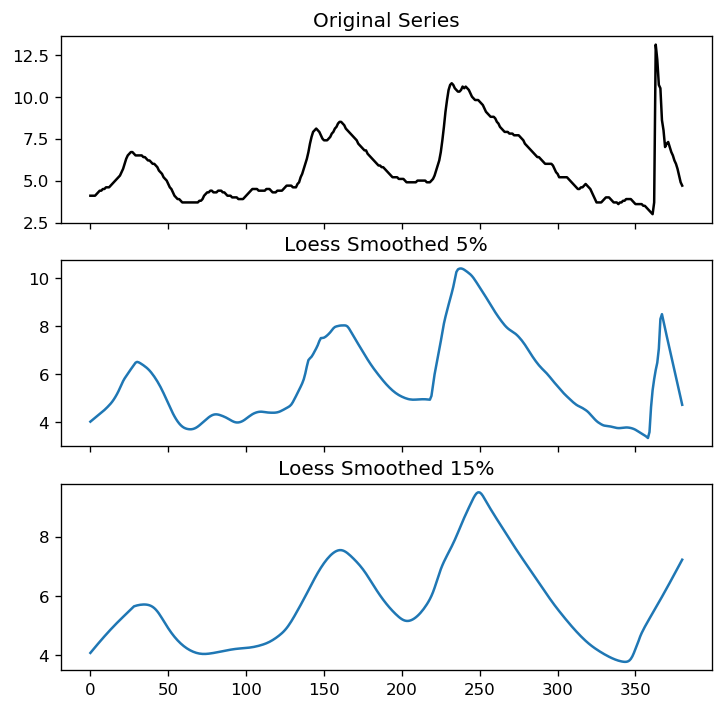

In [390]:
#REGIONAL DATA

import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
df_loess_5 = pd.DataFrame(lowess(data.unemployment, np.arange(len(data.unemployment)), frac=0.05)[:, 1], index=data.index, columns=['unemployment'])
df_loess_15 = pd.DataFrame(lowess(data.unemployment, np.arange(len(data.unemployment)), frac=0.15)[:, 1], index=data.index, columns=['unemployment'])



fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
data['unemployment'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['unemployment'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['unemployment'].plot(ax=axes[2], title='Loess Smoothed 15%')

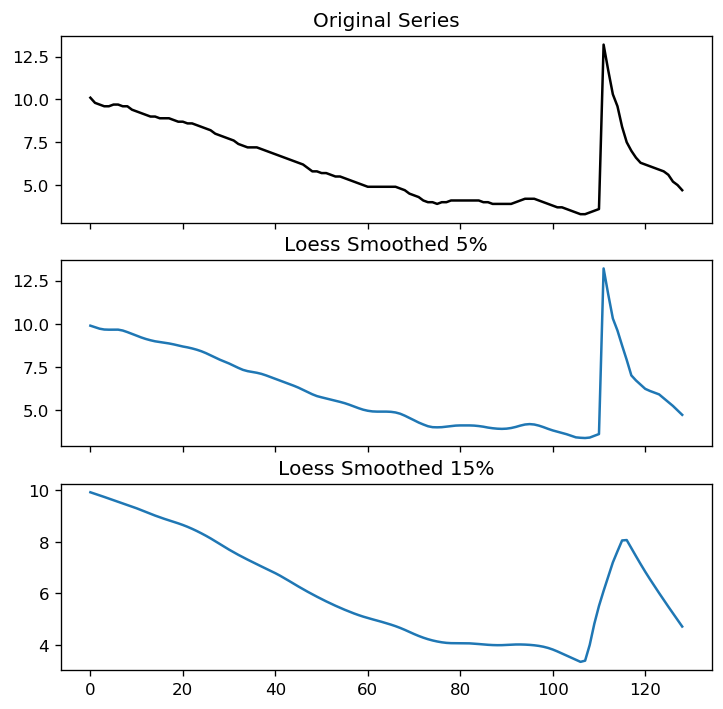

In [392]:
dfloess_5 = pd.DataFrame(lowess(nation_data['unemployment rate'], np.arange(len(nation_data['unemployment rate'])), frac=0.05)[:, 1], index=nation_data.index, columns=['unemployment rate'])
dfloess_15 = pd.DataFrame(lowess(nation_data['unemployment rate'], np.arange(len(nation_data['unemployment rate'])), frac=0.15)[:, 1], index=nation_data.index, columns=['unemployment rate'])



fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
nation_data['unemployment rate'].plot(ax=axes[0], color='k', title='Original Series')
dfloess_5['unemployment rate'].plot(ax=axes[1], title='Loess Smoothed 5%')
dfloess_15['unemployment rate'].plot(ax=axes[2], title='Loess Smoothed 15%')

It seems that for the first dataset involving the regional data involving unemployment rate, smoothing actually reduced the 
noise and made it more clear of the time series for prediciton. On the national data involving unemployment rate however, 
it seems smoothing did not help reduce much noise or uncover any underlying patterns.

### Prediction based on my birth month for 2022

For the national data it seems that the unemployment rate of my birth month of year 2022, it will be approximately 4.8 and 4.3 on the regional data 